In [1]:
from konlpy.tag import Okt
import pandas as pd
from collections import Counter

data=pd.read_csv("data.csv",sep="\t",encoding="utf-8")

In [3]:
okt=Okt()
parsed_data=[]
for i in data["title"]:
    parsed_data+=okt.pos(i,norm=True,stem=True)

word_list = []
stopword = ["없다","있다","재밌다","좋다","최고","같다","이","것","진짜","아니다","이렇다","그냥","하나","다시","많다","이다","최악",'완전',"안되다",'어떻다',"정말","보고",'정도','역시']
for word,tag in parsed_data:
    if tag in ["Noun"] and len(word)>1 and word not in stopword:
        word_list.append(word)


counts = Counter(word_list)
tags = counts.most_common(40)

In [4]:
tags

[('사람', 40),
 ('시험', 34),
 ('교수', 32),
 ('일선', 15),
 ('공부', 14),
 ('남자', 12),
 ('도서관', 11),
 ('질문', 10),
 ('지금', 9),
 ('여자', 9),
 ('축제', 9),
 ('알바', 9),
 ('원가회계', 9),
 ('이해', 8),
 ('추천', 8),
 ('오늘', 8),
 ('언제', 7),
 ('영어', 7),
 ('친구', 7),
 ('투자', 6),
 ('과제', 6),
 ('에타', 6),
 ('생각', 6),
 ('기숙사', 6),
 ('대학', 6),
 ('전역', 5),
 ('개론', 5),
 ('충남대', 5),
 ('전공', 5),
 ('회계', 5),
 ('경영', 5),
 ('내일', 5),
 ('학교', 5),
 ('궁동', 5),
 ('학과', 5),
 ('학점교류', 5),
 ('랜소', 4),
 ('긱사', 4),
 ('선배', 4),
 ('사회', 4)]

In [5]:
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences

stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']
max_len = 42
loaded_model = load_model('LSTMGRU.h5')

with open("senti_tokenizer.pickle","rb") as fr:
    tokenizer = pickle.load(fr)
# loaded_model = load_model('LSTMGRU.h5')
okt=Okt()
def predict_text(text):
    new_text = okt.morphs(text, stem=True)
    new_text = [word for word in new_text if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_text])
    pad_encoded_text = pad_sequences(encoded,maxlen=max_len)
    score = float(loaded_model.predict(pad_encoded_text))
    return score

def predict_senti(text):
    idx2label={0:"부정",1:"긍정"}
    score_list=[]
    for i in text:
        score_list.append(idx2label[round(predict_text(i))])
    return score_list

def predict_senti2(text):
    idx2label={0:"부정",1:"긍정",-1:"중립"}
    score_list = []
    for i in text:
        score = predict_text(i)
        if score >= 0.7:
            label = 1
        elif score <= 0.3:
            label = 0
        else:
            label = -1
        score_list.append(idx2label[label])
    return score_list

In [6]:
def add_dataframe_sentipredict(data,neutral=True):
    if neutral:
        sentence_senti_predictlist = predict_senti2(data)
    else:
        sentence_senti_predictlist = predict_senti(data)
    data = pd.DataFrame(data)
    data["감정"] = sentence_senti_predictlist
    return data

aaa = add_dataframe_sentipredict(data["title"])

1/1 [==============================] - 0s 15ms/step


In [9]:
def counter_(data,words):
    counters=[]
    for word in words:
        filtered_data = data[data["title"].str.contains(word)]
        counter = Counter(filtered_data["감정"])
        counters.append(counter)
    return counters

In [10]:
words = [i[0] for i in tags]
counters = counter_(aaa,words)

In [11]:
counters

[Counter({'중립': 25, '부정': 11, '긍정': 4}),
 Counter({'긍정': 9, '중립': 24, '부정': 1}),
 Counter({'긍정': 5, '중립': 23, '부정': 4}),
 Counter({'중립': 11, '부정': 4}),
 Counter({'부정': 6, '중립': 8}),
 Counter({'중립': 5, '부정': 7}),
 Counter({'중립': 9, '긍정': 2}),
 Counter({'중립': 7, '긍정': 3}),
 Counter({'긍정': 1, '부정': 4, '중립': 5}),
 Counter({'중립': 4, '부정': 4, '긍정': 1}),
 Counter({'중립': 2, '부정': 7}),
 Counter({'부정': 8, '중립': 1}),
 Counter({'중립': 9}),
 Counter({'부정': 2, '중립': 5, '긍정': 1}),
 Counter({'중립': 3, '긍정': 4, '부정': 1}),
 Counter({'중립': 4, '부정': 3, '긍정': 1}),
 Counter({'긍정': 1, '중립': 4, '부정': 1}),
 Counter({'긍정': 2, '중립': 4, '부정': 2}),
 Counter({'부정': 5, '중립': 2}),
 Counter({'긍정': 2, '중립': 3, '부정': 1}),
 Counter({'긍정': 2, '중립': 4}),
 Counter({'긍정': 1, '중립': 4, '부정': 1}),
 Counter({'중립': 7}),
 Counter({'중립': 4, '긍정': 1, '부정': 1}),
 Counter({'부정': 8, '중립': 2}),
 Counter({'중립': 4, '긍정': 1}),
 Counter({'중립': 5}),
 Counter({'부정': 3, '긍정': 2, '중립': 1}),
 Counter({'중립': 6}),
 Counter({'부정': 2, '중립': 12}),
 Cou

{'사람': '중립', '시험': '중립', '교수': '중립', '일선': '중립', '공부': '중립', '남자': '부정', '도서관': '중립', '질문': '중립', '지금': '부정', '여자': '부정', '축제': '부정', '알바': '부정', '원가회계': '중립', '이해': '중립', '추천': '긍정', '오늘': '부정', '언제': '중립', '영어': '중립', '친구': '부정', '투자': '긍정', '과제': '중립', '에타': '중립', '생각': '중립', '기숙사': '중립', '대학': '부정', '전역': '중립', '개론': '중립', '충남대': '부정', '전공': '중립', '회계': '중립', '경영': '긍정', '내일': '중립', '학교': '중립', '궁동': '부정', '학과': '부정', '학점교류': '중립', '랜소': '중립', '긱사': '중립', '선배': '긍정', '사회': '긍정'}


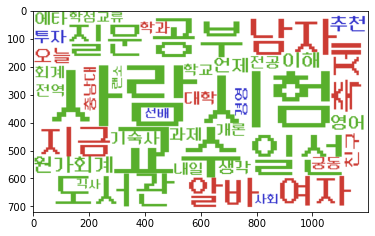

In [13]:
import matplotlib.pyplot as plt
def counter_to_sentilist(counters):
    senti_list = []
    for i in counters:
        if i["긍정"] + i["부정"] < i["중립"]:
            senti_list.append("중립")
        elif (i["긍정"]/(i["부정"]+0.1))>=1.1:
            senti_list.append("긍정")
        elif (i["부정"]/(i["긍정"]+0.1))>=1.1:
            senti_list.append("부정")
        else:
            senti_list.append("중립")
    return senti_list

senti_list = counter_to_sentilist(counters)

word_to_senti = [ [i[0],j] for i,j in zip(tags,senti_list)]
word_to_senti = dict(word_to_senti)
word_frequency = dict(tags)

def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    if word_to_senti[word]=="부정":
        return("hsl({:d},{:d}%, {:d}%)".format(3,60,50))
    elif word_to_senti[word]=="긍정":
        return("hsl({:d},{:d}%, {:d}%)".format(240,60,50))
    else:
        return("hsl({:d},{:d}%, {:d}%)".format(100,60,43))

from wordcloud import WordCloud

lightwordcloud = WordCloud(background_color='white', 
                      width=1200, height=720, font_path='./DungGeunMo.ttf',
                     color_func = color_func).generate_from_frequencies(word_frequency)

plt.imshow(lightwordcloud)
print(word_to_senti)

In [14]:
word_df = pd.DataFrame(zip(counts.keys(),counts.values()))

In [15]:
word_df.columns = ["단어","빈도"]

In [16]:
word_df

,단어,빈도
0,역학,1
1,쪽지,2
2,시험,34
3,가요,3
4,투자,6
...,...,...
775,임영웅,1
776,티켓팅,1
777,셤기간,1
778,볼링,1


In [17]:

tempdict = {}
for i,j in zip(counters,tags):
    dic= {"긍정":0,"부정":0,"중립":0}
    for key in i.keys():
        dic[key]=i[key]
    tempdict[j[0]] = dic

In [18]:
tempdict

{'사람': {'긍정': 4, '부정': 11, '중립': 25},
 '시험': {'긍정': 9, '부정': 1, '중립': 24},
 '교수': {'긍정': 5, '부정': 4, '중립': 23},
 '일선': {'긍정': 0, '부정': 4, '중립': 11},
 '공부': {'긍정': 0, '부정': 6, '중립': 8},
 '남자': {'긍정': 0, '부정': 7, '중립': 5},
 '도서관': {'긍정': 2, '부정': 0, '중립': 9},
 '질문': {'긍정': 3, '부정': 0, '중립': 7},
 '지금': {'긍정': 1, '부정': 4, '중립': 5},
 '여자': {'긍정': 1, '부정': 4, '중립': 4},
 '축제': {'긍정': 0, '부정': 7, '중립': 2},
 '알바': {'긍정': 0, '부정': 8, '중립': 1},
 '원가회계': {'긍정': 0, '부정': 0, '중립': 9},
 '이해': {'긍정': 1, '부정': 2, '중립': 5},
 '추천': {'긍정': 4, '부정': 1, '중립': 3},
 '오늘': {'긍정': 1, '부정': 3, '중립': 4},
 '언제': {'긍정': 1, '부정': 1, '중립': 4},
 '영어': {'긍정': 2, '부정': 2, '중립': 4},
 '친구': {'긍정': 0, '부정': 5, '중립': 2},
 '투자': {'긍정': 2, '부정': 1, '중립': 3},
 '과제': {'긍정': 2, '부정': 0, '중립': 4},
 '에타': {'긍정': 1, '부정': 1, '중립': 4},
 '생각': {'긍정': 0, '부정': 0, '중립': 7},
 '기숙사': {'긍정': 1, '부정': 1, '중립': 4},
 '대학': {'긍정': 0, '부정': 8, '중립': 2},
 '전역': {'긍정': 1, '부정': 0, '중립': 4},
 '개론': {'긍정': 0, '부정': 0, '중립': 5},
 '충남대': {'긍정': 2, '

In [19]:
wdf = pd.DataFrame(tempdict)
wdf = wdf.T
wdf['단어'] = wdf.index

In [20]:
wdf.head(4)

,긍정,부정,중립,단어
사람,4,11,25,사람
시험,9,1,24,시험
교수,5,4,23,교수
일선,0,4,11,일선


In [21]:
worddataframe = pd.merge(word_df,wdf,how='inner')

In [22]:
worddataframe.to_csv("word_frequency_senti.csv",sep="\t")